In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from sklearn import metrics

In [4]:
os.chdir('/Users/emma.tebbe/berkeley_git/w207_final_project')

In [5]:
data_1 = np.load('data/et_w207_project_npz_files_5000_tmp_tmp5ocrhjnn.npz')
data_1.close
data_2 = np.load('data/et_w207_project_npz_files_5000_tmp_tmp092sag67.npz')
data_2.close
data_3 = np.load('data/et_w207_project_npz_files_5000_tmp_tmpf31_pn8p.npz')
data_3.close
data_4 = np.load('data/et_w207_project_npz_files_5000_tmp_tmpq5b2g4n2.npz')
data_4.close
data_key = np.concatenate((data_1['arr_0'], data_2['arr_0'], data_3['arr_0'], data_4['arr_0']))
data_pixel = np.concatenate((data_1['arr_1'], data_2['arr_1'], data_3['arr_1'], data_4['arr_1']))

df = pd.read_csv('data/school_project_data_set-query.csv')

In [6]:
data_pixel

array([[-103.939    , -116.779    , -123.68     , ..., -103.939    ,
        -116.779    , -123.68     ],
       [ -46.939003 ,  -74.779    , -118.68     , ...,  -57.939003 ,
         -84.779    , -118.68     ],
       [ 151.061    ,  138.22101  ,  131.32     , ...,  151.061    ,
         138.22101  ,  131.32     ],
       ...,
       [  77.061    ,   46.221    ,   32.32     , ...,  -55.939003 ,
         -38.779    ,    1.3199997],
       [-102.939    , -115.779    , -122.68     , ...,  -68.939    ,
         -95.779    , -114.68     ],
       [ 112.061    ,  100.221    ,   89.32     , ...,   -5.939003 ,
          33.221    ,    3.3199997]], dtype=float32)

In [7]:
data_dict = {}
for i in range(data_key.shape[0]):
    data_dict[data_key[i]] = [data_pixel[i]]

df_pixel = pd.DataFrame(data=data_dict)
df_pixel_t = df_pixel.transpose()
df_pixel_t.index.names = ['attachment_key']
df_pixel_t.columns = ['pixel_array']
df_pixel_t

,pixel_array
attachment_key,
ozbpir-9ey6js-ggdqwo,"[-103.939, -116.779, -123.68, -103.939, -116.7..."
378ykanq,"[-46.939003, -74.779, -118.68, -24.939003, -57..."
p366md-big834-7o23k6,"[151.061, 138.22101, 131.32, 151.061, 138.2210..."
3zruwvl2,"[-3.939003, -66.779, -96.68, -3.939003, -66.77..."
q18iae-3vnh74-79npmy,"[-103.939, -116.779, -123.68, -103.939, -116.7..."
...,...
pktyig-481wyg-6gyulf,"[-91.939, -104.779, -97.68, -92.939, -105.779,..."
zu7y3rha,"[-1.939003, -14.778999, -21.68, -1.939003, -14..."
pxcwxf-8tnpyg-8vhb9r,"[77.061, 46.221, 32.32, 79.061, 49.221, 33.32,..."


In [8]:
merge_meta_pixel = df.merge(df_pixel_t, on='attachment_key')
combined_df = merge_meta_pixel[['attachment_key', 'size_mb', 'height', 'width', 'h_to_w',  'pixel_array', 'filename','logo']]
combined_df.head()

,attachment_key,size_mb,height,width,h_to_w,pixel_array,filename,logo
0,00xjny6u,0.011849,520.0,506.0,1.027668,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",Esterdale Theatre - Logo.png,1
1,04o31jop,0.012610,269.0,396.0,0.679293,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",BLUE_LOGO.png,1
2,0840h7ox,0.399114,518.0,920.0,0.563044,"[27.060997, 14.221001, 13.32, 23.060997, 13.22...",ZEN_LB-5.jpg,0
3,0awudx2h,0.011226,200.0,200.0,1.000000,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",article central 200.jpg,1
4,0bb8y85h,0.263813,885.0,800.0,1.106250,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",1116-100_WGTank_white.jpg,0


In [9]:
file_types = []
for item in combined_df['filename']:
    file_types.append(item[-3:].lower())

print(set(file_types))

#File types should be png, jpg or other
#Need to one hot encode these

{'jpg', '0mm', 'jpe', 'hot', 'lue', 'pig', '73e', 'age', 'png', 'ite', 'ack', 'peg'}


In [10]:
filetype_encoding = []
for item in combined_df['filename']:
    if item[-3:].lower() == 'jpg':
        filetype_encoding.append('jpg')
    elif item[-3:].lower() == 'png':
        filetype_encoding.append('png')
    else:
        filetype_encoding.append('other')

In [11]:
combined_df['filetype'] = filetype_encoding
combined_df = combined_df[['attachment_key', 'size_mb', 'height', 'width', 'h_to_w', 'filetype', 'pixel_array', 'filename','logo']]
combined_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,attachment_key,size_mb,height,width,h_to_w,filetype,pixel_array,filename,logo
0,00xjny6u,0.011849,520.0,506.0,1.027668,png,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",Esterdale Theatre - Logo.png,1
1,04o31jop,0.012610,269.0,396.0,0.679293,png,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",BLUE_LOGO.png,1
2,0840h7ox,0.399114,518.0,920.0,0.563044,jpg,"[27.060997, 14.221001, 13.32, 23.060997, 13.22...",ZEN_LB-5.jpg,0
3,0awudx2h,0.011226,200.0,200.0,1.000000,jpg,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",article central 200.jpg,1
4,0bb8y85h,0.263813,885.0,800.0,1.106250,jpg,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",1116-100_WGTank_white.jpg,0


In [12]:
# get dummies
cork_dummies = pd.get_dummies(combined_df.filetype)

# add to initial df
combined_df = pd.concat((combined_df, cork_dummies), axis=1)

# print head of df
combined_df.head()

,attachment_key,size_mb,height,width,h_to_w,filetype,pixel_array,filename,logo,jpg,other,png
0,00xjny6u,0.011849,520.0,506.0,1.027668,png,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",Esterdale Theatre - Logo.png,1,0,0,1
1,04o31jop,0.012610,269.0,396.0,0.679293,png,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",BLUE_LOGO.png,1,0,0,1
2,0840h7ox,0.399114,518.0,920.0,0.563044,jpg,"[27.060997, 14.221001, 13.32, 23.060997, 13.22...",ZEN_LB-5.jpg,0,1,0,0
3,0awudx2h,0.011226,200.0,200.0,1.000000,jpg,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",article central 200.jpg,1,1,0,0
4,0bb8y85h,0.263813,885.0,800.0,1.106250,jpg,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",1116-100_WGTank_white.jpg,0,1,0,0


In [13]:
combined_df = combined_df[['attachment_key', 'size_mb', 'height', 'width', 'h_to_w', 'jpg', 'png', 'other', 'pixel_array', 'filetype','filename','logo']]
combined_df.head()

,attachment_key,size_mb,height,width,h_to_w,jpg,png,other,pixel_array,filetype,filename,logo
0,00xjny6u,0.011849,520.0,506.0,1.027668,0,1,0,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",png,Esterdale Theatre - Logo.png,1
1,04o31jop,0.012610,269.0,396.0,0.679293,0,1,0,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",png,BLUE_LOGO.png,1
2,0840h7ox,0.399114,518.0,920.0,0.563044,1,0,0,"[27.060997, 14.221001, 13.32, 23.060997, 13.22...",jpg,ZEN_LB-5.jpg,0
3,0awudx2h,0.011226,200.0,200.0,1.000000,1,0,0,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",jpg,article central 200.jpg,1
4,0bb8y85h,0.263813,885.0,800.0,1.106250,1,0,0,"[151.061, 138.22101, 131.32, 151.061, 138.2210...",jpg,1116-100_WGTank_white.jpg,0


In [14]:
combined_df.describe()

,size_mb,height,width,h_to_w,jpg,png,other,logo
count,3755.000000,3754.000000,3754.000000,3754.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2.320780,1722.128396,2288.567395,0.758507,0.616245,0.367510,0.016245,0.595473
std,6.304738,1686.929969,2006.283316,0.421649,0.486364,0.482191,0.126433,0.490866
min,0.000226,1.000000,1.000000,0.052055,0.000000,0.000000,0.000000,0.000000
25%,0.038580,454.250000,800.000000,0.514872,0.000000,0.000000,0.000000,0.000000
50%,0.257622,1065.000000,1551.000000,0.666731,1.000000,0.000000,0.000000,1.000000
75%,1.778975,2643.750000,3245.500000,1.000000,1.000000,1.000000,0.000000,1.000000
max,224.959750,15119.000000,16000.000000,4.315143,1.000000,1.000000,1.000000,1.000000


In [15]:
combined_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   attachment_key  3755 non-null   object 
 1   size_mb         3755 non-null   float64
 2   height          3754 non-null   float64
 3   width           3754 non-null   float64
 4   h_to_w          3754 non-null   float64
 5   jpg             3755 non-null   uint8  
 6   png             3755 non-null   uint8  
 7   other           3755 non-null   uint8  
 8   pixel_array     3755 non-null   object 
 9   filetype        3755 non-null   object 
 10  filename        3755 non-null   object 
 11  logo            3755 non-null   int64  
dtypes: float64(4), int64(1), object(4), uint8(3)
memory usage: 304.4+ KB


In [16]:
combined_df = combined_df[combined_df.height.notnull()]
combined_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3754 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   attachment_key  3754 non-null   object 
 1   size_mb         3754 non-null   float64
 2   height          3754 non-null   float64
 3   width           3754 non-null   float64
 4   h_to_w          3754 non-null   float64
 5   jpg             3754 non-null   uint8  
 6   png             3754 non-null   uint8  
 7   other           3754 non-null   uint8  
 8   pixel_array     3754 non-null   object 
 9   filetype        3754 non-null   object 
 10  filename        3754 non-null   object 
 11  logo            3754 non-null   int64  
dtypes: float64(4), int64(1), object(4), uint8(3)
memory usage: 304.3+ KB


In [17]:
#Feature is just the pixel array
X = np.array(combined_df.iloc[:3755,8].tolist())
print(X[0])
print(X.shape)
print(np.count_nonzero(np.isnan(X)))

[151.061   138.22101 131.32    ... 151.061   138.22101 131.32   ]
(3754, 150528)
0


In [18]:
#Features are size, height, width, h_to_w
X2 = combined_df.iloc[:3755, 1:5].values
print(X2[0])
print(X2.shape)
print(np.count_nonzero(np.isnan(X2)))

[1.184900e-02 5.200000e+02 5.060000e+02 1.027668e+00]
(3754, 4)
0


In [19]:
#Features are size, height, width, h_to_w, pixel_array
X3 = np.concatenate((X2,X), axis=1)
print(X3.shape)
print(X3[0][0])
print(np.count_nonzero(np.isnan(X3)))

(3754, 150532)
0.011849
0


In [20]:
#Features are size, height, width, h_to_w, filetype
X4 = combined_df.iloc[:3755, 1:8].values
print(X4[0])
print(X4.shape)
print(np.count_nonzero(np.isnan(X4)))

[1.184900e-02 5.200000e+02 5.060000e+02 1.027668e+00 0.000000e+00
 1.000000e+00 0.000000e+00]
(3754, 7)
0


In [21]:
#Features are size, height, width, h_to_w, filetype, pixel array
X5 = np.concatenate((X4,X), axis=1)
print(X5.shape)
print(X5[0][0])
print(np.count_nonzero(np.isnan(X5)))

(3754, 150535)
0.011849
0


In [27]:
X6 = combined_df.iloc[:3755, [1, 4,5,6,7]].values
#X6 = np.concatenate((X6,X), axis=1)
print(X6.shape)
print(X6[0][0])
#print(np.count_nonzero(np.isnan(X6)))

(3754, 5)
0.011849


In [26]:
X7 = combined_df.iloc[:3755, [1,2,3,5,6,7]].values
#X7 = np.concatenate((X7,X), axis=1)
print(X7.shape)
print(X7[0])
#print(np.count_nonzero(np.isnan(X6)))

(3754, 6)
[1.1849e-02 5.2000e+02 5.0600e+02 0.0000e+00 1.0000e+00 0.0000e+00]


In [38]:
Y = np.array(combined_df['logo'])
colors = ['r' if label == 0 else 'g' for label in Y]
print(Y.shape)
print(len(colors))

(3754,)
3754


In [23]:
# TO KEEP TRACK
# Y - logo / not logo
# X - just pixel array
# X2 - size, height, width, h_to_w
# X3 - size, height, width, h_to_w, pixel_array
# X4 - size, height, width, h_to_w, filetype
# X5 - size, height, width, h_to_w, filetype, pixel array
# X6 - size, h_to_w, filetype
# X7 - size, height, width, filetype

In [30]:
ss1 = StandardScaler()
XS = ss1.fit_transform(X)
#XS = XS[~np.isnan(X2S).any(axis=1)]

In [153]:
ss2 = StandardScaler()
X2S = ss2.fit_transform(X2)

#X2S = X2S[~np.isnan(X2S).any(axis=1)]

In [154]:
ss3 = StandardScaler()
X3S = ss3.fit_transform(X3)
#X3S = X3S[~np.isnan(X3S).any(axis=1)]


In [155]:
ss4 = StandardScaler()
X4S = ss3.fit_transform(X4)
#X4S = X4S[~np.isnan(X4S).any(axis=1)]

In [156]:
ss5 = StandardScaler()
X5S = ss3.fit_transform(X5)
#X5S = X5S[~np.isnan(X5S).any(axis=1)]

In [157]:
print(np.count_nonzero(np.isnan(X2S)))
print(np.count_nonzero(np.isnan(X3S)))
print(np.count_nonzero(np.isnan(X4S)))
print(np.count_nonzero(np.isnan(X5S)))

0
0
0
0


In [31]:
pca1 = PCA(n_components=2)
x_pca1 = pca1.fit_transform(XS)


In [159]:
pca2 = PCA(n_components=2)
x_pca2 = pca2.fit_transform(X2S)

In [160]:


pca3 = PCA(n_components=2)
x_pca3 = pca3.fit_transform(X3S)

pca4 = PCA(n_components=2)
x_pca4 = pca4.fit_transform(X4S)

pca5 = PCA(n_components=2)
x_pca5 = pca5.fit_transform(X5S)

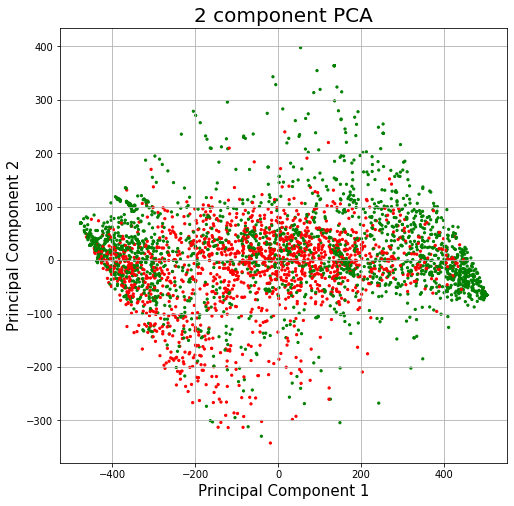

In [165]:
x = [item[0] for item in x_pca1] 
y = [item[1] for item in x_pca1] 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x, y, c=colors, s = 5)
ax.grid()

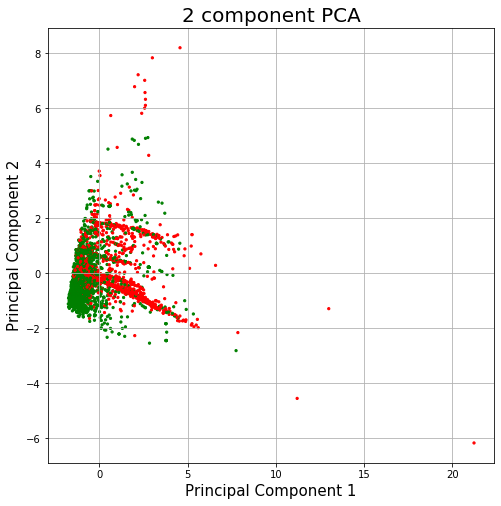

In [166]:
x = [item[0] for item in x_pca2] 
y = [item[1] for item in x_pca2] 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x, y, c = colors, s = 5)
ax.grid()

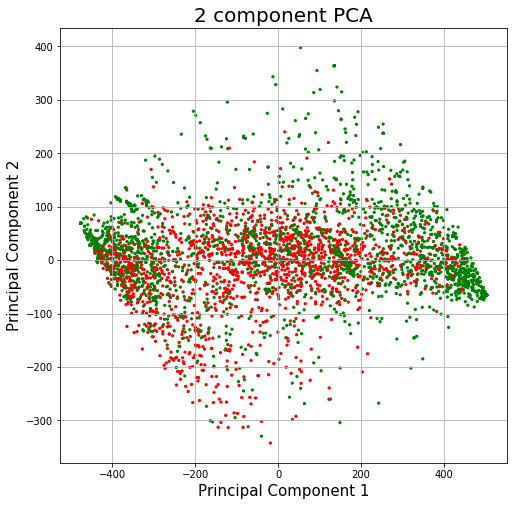

In [167]:
x = [item[0] for item in x_pca3] 
y = [item[1] for item in x_pca3] 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x, y, c = colors, s = 5)
ax.grid()

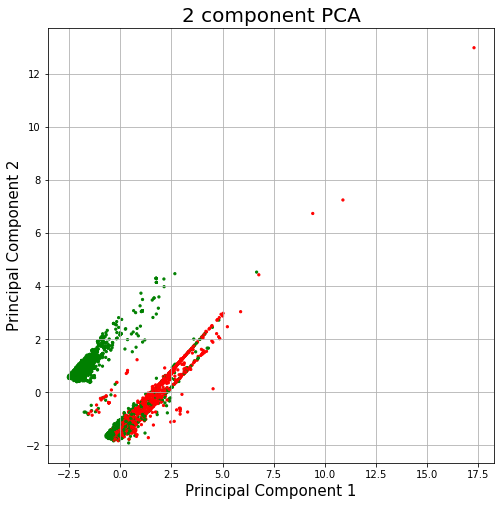

In [169]:
x = [item[0] for item in x_pca4] 
y = [item[1] for item in x_pca4] 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x, y, c = colors, s = 5)
ax.grid()

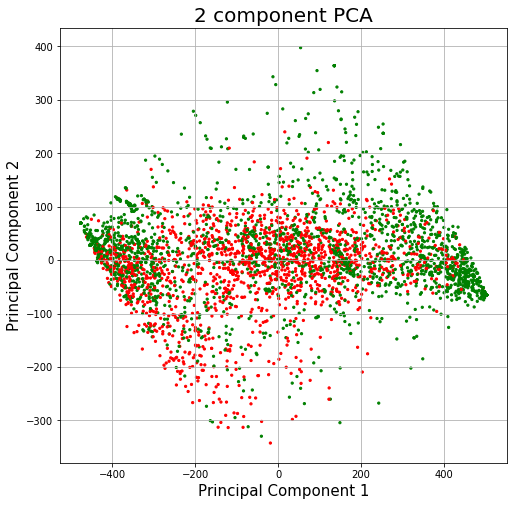

In [171]:
x = [item[0] for item in x_pca5] 
y = [item[1] for item in x_pca5] 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x, y, c = colors, s = 5)
ax.grid()

In [ ]:
# FOR REFERENCE
# X8 - size, h_to_w, filetype, 2 component PCA of pixels
# X9 - size, height, width, filetype, 2 component PCA of pixels

In [33]:
X8 = np.concatenate((X6,x_pca1), axis=1)
X9 = np.concatenate((X7,x_pca1), axis=1)

In [35]:
X8[0]

array([ 1.18490000e-02,  1.02766800e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00, -4.08680481e+02,  5.35631294e+01])

In [36]:
X9[0]

array([ 1.18490000e-02,  5.20000000e+02,  5.06000000e+02,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00, -4.08680481e+02,  5.35631294e+01])

In [47]:
# X8
# Split into train and test data
train_data8, test_data8, train_labels8, test_labels8 = train_test_split(X8, Y, test_size=0.4, random_state=1, stratify=Y)

# Split test data into development data and training into mini train set for computation time
print('Test data shape for split:', test_data8.shape)
dev_data8, dev_labels8 = test_data8[:751], test_labels8[:751]
mini_train_data8, mini_train_labels8 = train_data8[:100], train_labels8[:100]
print('Train data shape:', train_data8.shape)

Test data shape for split: (1502, 7)
Train data shape: (2252, 7)


In [48]:
# X9
# Split into train and test data
train_data9, test_data9, train_labels9, test_labels9 = train_test_split(X9, Y, test_size=0.4, random_state=1, stratify=Y)

# Split test data into development data and training into mini train set for computation time
print('Test data shape for split:', test_data9.shape)
dev_data9, dev_labels9 = test_data9[:751], test_labels9[:751]
mini_train_data9, mini_train_labels9 = train_data9[:100], train_labels9[:100]
print('Train data shape:', train_data9.shape)

Test data shape for split: (1502, 8)
Train data shape: (2252, 8)


In [55]:
c_values = [0.001]
LR8 = []
for c in c_values:
    clf8 = LogisticRegression(C=c, solver='liblinear', multi_class='auto')
    clf8.fit(mini_train_data8, mini_train_labels8)
    clf_pred8 = clf8.predict(dev_data8)
    coef_vector8 = clf8.coef_
    LR8.append(round(metrics.f1_score(dev_labels8, clf_pred8, average='weighted'),3))
    
print(LR8)

[0.601]


In [61]:
c_values = [0.001]
LR9 = []
for c in c_values:
    clf9 = LogisticRegression(C=c, solver='liblinear', multi_class='auto')
    clf9.fit(mini_train_data9, mini_train_labels9)
    clf_pred9 = clf9.predict(dev_data9)
    coef_vector9 = clf9.coef_
    LR9.append(round(metrics.f1_score(dev_labels9, clf_pred9, average='weighted'),3))
    
print(LR9)

[0.658]


In [74]:
k_list = []
X8_F1 = []
X9_F1 = []
X8_acc = []
X9_acc = []
c_vals = [0.00001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 5]
c_list = []
for k in range(1,20):
    print("k={0}".format(k))
    
    pca = PCA(n_components=k)
    x_pca = pca.fit_transform(XS)
    X8 = np.concatenate((X6,x_pca), axis=1)
    X9 = np.concatenate((X7,x_pca), axis=1)
    
    # Split into train and test data
    train_data8, test_data8, train_labels8, test_labels8 = train_test_split(X8, Y, test_size=0.4, random_state=1, stratify=Y)

    # Split test data into development data and training into mini train set for computation time
    dev_data8, dev_labels8 = test_data8[:751], test_labels8[:751]
    mini_train_data8, mini_train_labels8 = train_data8[:100], train_labels8[:100]
    
    # X9
    # Split into train and test data
    train_data9, test_data9, train_labels9, test_labels9 = train_test_split(X9, Y, test_size=0.4, random_state=1, stratify=Y)

    # Split test data into development data and training into mini train set for computation time
    dev_data9, dev_labels9 = test_data9[:751], test_labels9[:751]
    mini_train_data9, mini_train_labels9 = train_data9[:100], train_labels9[:100]
    
    for c in c_vals:
        k_list.append(k)
        c_list.append(c)
        clf8 = LogisticRegression(C=c, solver='liblinear', multi_class='auto')
        clf8.fit(mini_train_data8, mini_train_labels8)
        clf_pred8 = clf8.predict(dev_data8)
        coef_vector8 = clf8.coef_
        LR8 = round(metrics.f1_score(dev_labels8, clf_pred8, average='weighted'),3)
        X8_F1.append(LR8)
        error8 = (dev_labels8 != clf_pred8).sum()/len(clf_pred8)
        acc8 = round(1-error8,3)
        X8_acc.append(acc8)

        clf9 = LogisticRegression(C=c, solver='liblinear', multi_class='auto')
        clf9.fit(mini_train_data9, mini_train_labels9)
        clf_pred9 = clf9.predict(dev_data9)
        coef_vector9 = clf9.coef_
        LR9 = round(metrics.f1_score(dev_labels9, clf_pred9, average='weighted'),3)
        X9_F1.append(LR9)
        error9 = (dev_labels9 != clf_pred9).sum()/len(clf_pred9)
        acc9 = round(1-error9,3)
        X9_acc.append(acc9)

print(str(max(X8_acc)))
print(str(max(X9_acc)))


k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10
k=11
k=12
k=13
k=14
k=15
k=16
k=17
k=18
k=19
0.848
0.814


In [75]:
max_ind = X8_acc.index(max(X8_acc))
print(max_ind)

4


In [76]:
print("K = {0}".format(k_list[max_ind]))
print("C = {0}".format(c_list[max_ind]))

K = 1
C = 0.1


In [72]:
print(k_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
